# Loading `cleaned` into memory using R's magic

In [1]:
cleaned <- read.csv("cleaned", header=0, row.names=1,sep="\t", skip=0)

In [2]:
cleaned[1:10,]

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,⋯,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
IDs,189676HUEX1A11,189694HUEX1A11,189682HUEX1A11,189598HUEX1A11,189688HUEX1A11,189604HUEX1A11,190217HUEX1A11,189700HUEX1A11,189706HUEX1A11,190223HUEX1A11,⋯,190253HUEX1A11,189652HUEX1A11,190259HUEX1A11,189724HUEX1A11,190265HUEX1A11,189592HUEX1A11,189586HUEX1A11,189658HUEX1A11,190271HUEX1A11,NA
ModalAllele,872,297,593,408,717,1035,373,118,280,993,⋯,83,12,999,13,561,77,240,866,697,NA
EstProgAllele,600,227,301,211,320,695,243,105,161,565,⋯,80,12,745,13,411,77,199,341,397,NA
BloodOrMuscle,blood,blood,blood,blood,blood,blood,blood,blood,blood,blood,⋯,blood,blood,blood,blood,blood,blood,blood,blood,blood,NA
CaseOrControl,case,case,case,case,case,case,case,case,case,case,⋯,case,control,case,control,case,case,case,case,case,NA
Affymetrix,,,,,,,,,,,⋯,,,,,,,,,,NA
2315554,7.54562452199732,7.92822629499209,7.37799075276035,7.65548209875939,7.57093054618854,7.39043110598283,7.93236336784328,7.69190230292279,7.7553763450354,7.63881250598766,⋯,7.79638565762349,7.39322130340589,7.35524974833712,7.61345046603071,7.5802745543772,7.438967257928,7.79656306421823,7.54491972528463,7.71110952866039,NA
2315633,7.75419751955504,7.81286950238158,7.62017816226721,7.58644469189377,7.62044628447126,7.6790780698536,7.81515056847246,7.77390723082205,7.85761002145419,7.7421581266415,⋯,7.75361274261499,7.6562914674899,7.59784923654693,7.75801630305136,7.76767426665971,7.66832685675752,7.67880199655039,7.62012544146659,7.70405517462418,NA
2315674,7.42374376966767,7.55532317858329,7.21815970079799,7.32684853229876,7.19838742086076,7.22521680872317,7.81837388521118,7.52968851302497,7.60154807383287,7.408141385361,⋯,7.65915978236832,7.20499323328491,7.17425821435854,7.4837839117283,7.37956192140221,7.25863032726496,7.67661350044641,7.39656522107631,7.46156818997168,NA
2315739,7.79298933045145,7.76788616920865,7.44381536677364,7.85612264152468,7.57073971780327,7.54271074637664,7.90450516229033,7.7014701671821,7.94166831902508,7.71928294123068,⋯,7.68970137410419,7.43518466802329,7.49243427489605,7.66052822366097,7.7024972305775,7.66207218936039,7.83097776627451,7.54964765388475,7.7557315215821,NA


## Renaming column and row descriptions appropriately

In [3]:
cleaned[,ncol(cleaned)] <- NULL

renameNumCols <- function(table, rowName) {
    result <- c()

    for (val in table[rowName,]) {
        result <- c(result, paste("X", val, sep=""))
    }
    
    colnames(table) <- result
    return(table)
}

renameNumRowsSelf <- function(table) {
    result <- c()
    for (rowName in rownames(table)) {
        result <- c(result, paste("X", rowName, sep=""))
    }
    rownames(table) <- result
    return(table)
}

cleaned <- renameNumCols(cleaned, "IDs")

counter <- 0
for (val in rownames(cleaned)) {
    counter <- counter + 1
    if (val == "Affymetrix") {
        break
    }
}

metadata <- cleaned[c(1:counter-1),]
data <- cleaned[c((counter+1):nrow(cleaned)),]

data <- renameNumRowsSelf(data)

metadata <- t(metadata)

metadata

,IDs,ModalAllele,EstProgAllele,BloodOrMuscle,CaseOrControl
X189676HUEX1A11,189676HUEX1A11,872,600,blood,case
X189694HUEX1A11,189694HUEX1A11,297,227,blood,case
X189682HUEX1A11,189682HUEX1A11,593,301,blood,case
X189598HUEX1A11,189598HUEX1A11,408,211,blood,case
X189688HUEX1A11,189688HUEX1A11,717,320,blood,case
X189604HUEX1A11,189604HUEX1A11,1035,695,blood,case
X190217HUEX1A11,190217HUEX1A11,373,243,blood,case
X189700HUEX1A11,189700HUEX1A11,118,105,blood,case
X189706HUEX1A11,189706HUEX1A11,280,161,blood,case
X190223HUEX1A11,190223HUEX1A11,993,565,blood,case


In [4]:
#typeof(data[1:10,][1,1])
#data <- as.numeric(data)
#unlist(data[1,])
tmp = as.matrix(data)
tmp2 = matrix(as.numeric(tmp),nrow=nrow(tmp))
dimnames(tmp2) <- dimnames(data)
data <- tmp2

In [5]:
#design <- data.frame("ModalAllele" = as.numeric(metadata[,"ModalAllele"]))
tmp = as.data.frame(metadata)
#metadata[,"ModalAllele"]
ModalAllele = as.numeric(metadata[,"ModalAllele"])
names(ModalAllele) <- rownames(metadata)
#design <- model.matrix(~ModalAllele, data = tmp)

#rownames(design) <- rownames(metadata)
#typeof(design[1, 1])
#design
design <- model.matrix(~ModalAllele)
design

,(Intercept),ModalAllele
1,1,872
2,1,297
3,1,593
4,1,408
5,1,717
6,1,1035
7,1,373
8,1,118
9,1,280
10,1,993


### Example of fitting a single linear regression using built-in lm. I'm surprised at the amount of hackery involved to get this working -- clearly I'm doing something wrong.

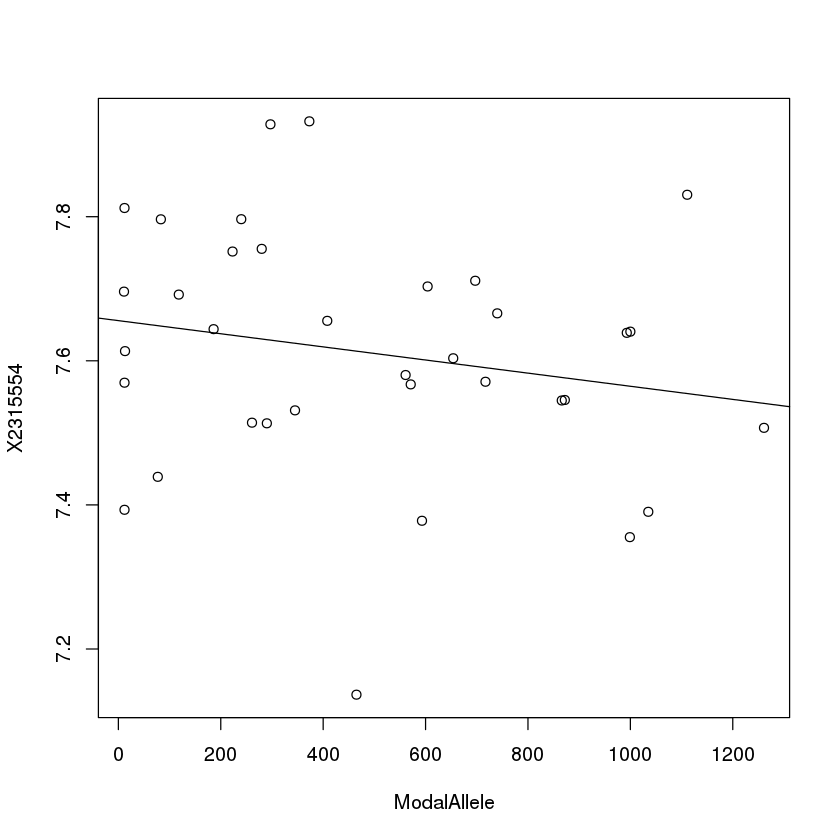

In [6]:
exampleData <- cleaned[c("ModalAllele", "2315554"), ]

rownames(exampleData) <- c("ModalAllele", "X2315554")
exampleData <- t(exampleData)
actualFrame <- data.frame("ModalAllele" = as.numeric(exampleData[,"ModalAllele"]), "X2315554" = as.numeric(exampleData[,"X2315554"]))
fit <- lm(X2315554 ~ ModalAllele, data=actualFrame)
plot(actualFrame)
abline(fit)

## The real deal -- fitting model with limma

In [7]:
#typeof(data[1, 1])
#data2 <- as.matrix(data)

In [8]:
#data3 <- as.numeric(data2)

In [9]:
#data4 <- matrix(data3, ncol=ncol(data), nrow=nrow(data))

In [10]:
#rownames(data4) <- rownames(data2)
#colnames(data4) <- colnames(data2)

In [11]:
library(limma)
require(Biobase)

#eset <- new("ExpressionSet", exprs=data)

# no idea how to fix this...
result <- lmFit(data, design)

Loading required package: Biobase
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following object is masked from ‘package:limma’:

    plotMA

The following objects are masked from ‘package:stats’:

    IQR, mad, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colnames, do.call,
    duplicated, eval, evalq, Filter, Find, get, grep, grepl, intersect,
    is.unsorted, lapply, lengths, Map, mapply, match, mget, order,
    paste, pmax, pmax.int, pmin, pmin.int, Position, rank, rbind,
    Reduce, rownames, sapply, setdiff, sort, table, tapply, union,
    unique, unsplit

Welcome to Bioconductor

    Vignettes contain introductory ma

In [12]:
resultEbayes <- eBayes(result)
all <- topTable(resultEbayes, n=Inf)
topTable(resultEbayes, n=10)

Removing intercept from test coefficients
Removing intercept from test coefficients


,logFC,AveExpr,t,P.Value,adj.P.Val,B
X3139557,0.0004358343,3.952218,5.253044,6.619087e-06,0.1067018,-1.172936
X2968452,0.0008588856,4.205140,5.129498,9.695320e-06,0.1067018,-1.552450
X2358393,-0.0003425739,7.762223,-4.551211,5.694836e-05,0.4178301,-3.304764
X2383894,0.0012762241,9.345057,4.445683,7.834764e-05,0.4180949,-3.618839
X2968373,-0.0003627885,6.815922,-4.296557,1.226206e-04,0.4180949,-4.058839
X3470372,0.0010136962,4.437284,4.270111,1.327077e-04,0.4180949,-4.136362
X2620894,-0.0002457332,6.202553,-4.215756,1.560605e-04,0.4180949,-4.295189
X2677624,-0.0003513929,5.775034,-4.137725,1.967606e-04,0.4180949,-4.521951
X2968387,-0.0005977949,6.962910,-4.127107,2.030459e-04,0.4180949,-4.552690
X2905404,0.0006313723,11.497446,4.088992,2.272658e-04,0.4180949,-4.662793


## Write genes sorted by relevance for further work in python.

In [13]:
write.table(all, file = "cleanedLimma")

In [14]:
topTable(resultEbayes, n=nrow(data))[(nrow(data) - 10):nrow(data),]

Removing intercept from test coefficients


,logFC,AveExpr,t,P.Value,adj.P.Val,B
X3982534,7.069761e-08,5.287067,6.563706e-04,0.9994799,0.9998911,-11.73684
X3225398,-5.813679e-08,9.018992,-6.167729e-04,0.9995112,0.9998911,-11.73684
X2777412,5.167035e-08,9.161850,5.327722e-04,0.9995778,0.9998911,-11.73684
X4019849,4.986172e-08,9.012653,4.734260e-04,0.9996248,0.9998911,-11.73684
X3825154,3.734245e-08,8.308442,3.982113e-04,0.9996844,0.9998911,-11.73684
X2639054,-5.189129e-08,9.158939,-3.931489e-04,0.9996884,0.9998911,-11.73684
X3980903,3.949344e-08,8.823948,3.667740e-04,0.9997093,0.9998911,-11.73684
X3167684,-2.161903e-08,6.157896,-2.792296e-04,0.9997787,0.9999150,-11.73684
X3456081,4.047845e-09,7.148306,7.850441e-05,0.9999378,0.9999568,-11.73684
X3453506,8.547784e-09,6.736302,5.555750e-05,0.9999560,0.9999568,-11.73684
